# AKARI-SEP: Validation Checks (FULL)

In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import numpy as np
from astropy.table import Table
import itertools

import time


In [3]:
t0 = time.time()

catname = "/data/help/master_catalogue_akari-sep_20180122.fits"
master_catalogue = Table.read(catname)

print('Elapsed time(secs): ', time.time() - t0)

print("Number of sources in master catalogue: ", len(master_catalogue))

Elapsed time(secs):  9.240604639053345
Number of sources in master catalogue:  844172


In [4]:
field = master_catalogue["field"][0]
field = field.rstrip()    # remove whitespaces at the end of the sting
print(field)

AKARI-SEP


In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [9]:
u_bands = []
g_bands = ["DECam g"]
r_bands = ["DECam r"]
i_bands = ["DECam i"]
z_bands = ["DECam z"]
y_bands = ["DECam y"]
J_bands = [           "VISTA J"]
H_bands = [           "VISTA H"]
K_bands = [           "VISTA K"]

all_bands = []

irac_mags = ["IRAC i1", "IRAC i2"]

other_mags = []

opt_mags = g_bands + r_bands + i_bands + z_bands + y_bands
ir_mags = J_bands + H_bands + K_bands + irac_mags
all_mags = opt_mags + ir_mags + other_mags

## 1/ Magnitude errors

In [7]:
def mag_vs_err(x, y, fig, ax, labels=("x", "y"), savefig=False):

    x_label, y_label = labels
    print(x_label)

    # Use only finite values
    mask = np.isfinite(x) & np.isfinite(y) & (x!=99.) & (y!=99.)
    x = np.copy(x[mask])
    y = np.copy(y[mask])
   
    if len(x) > 0:
        print("    Error max: {:.0f}".format(np.max(y)))
        err10 = y > 10
        if len(x[err10]) > 0:
            print("    magerr > 10: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err10]), np.min(x[err10])))
        else:
            print("    magerr > 10: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err10]), np.nan))
        err100 = y > 100
        if len(x[err100]) > 0:
            print("    magerr > 100: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err100]), np.min(x[err100])))
        else:
            print("    magerr > 100: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err100]), np.nan))
        err1000 = y > 1000
        if len(x[err1000]) > 0:
            print("    magerr > 1000: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err1000]), np.min(x[err1000])))
        else:
            print("    magerr > 1000: Number of objects = {:d}, min mag = {:.1f}".format(len(x[err1000]), np.nan))
    else:
        print("    no data")
    print("")


    # Plot
    ax.set_yscale('log')    # to place before scatter to avoid issues
    ax.scatter(x, y, marker='.', alpha=0.1, s=50)
    ax.invert_xaxis()
    #ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax.get_xaxis().get_major_formatter().labelOnlyBase = False
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])

    # Save ex. fig
    if savefig:
        survey_label = ((x_label.replace(" ", "_")).replace("(", "")).replace(")", "")
        figname = field + "_magVSmagerr_" + survey_label + ".png"
        plt.savefig("/data/help/plots/" + figname, bbox_inches='tight')
    #plt.show()
        

DECam g mag (aperture)
    Error max: 236659
    magerr > 10: Number of objects = 1504, min mag = 27.3
    magerr > 100: Number of objects = 161, min mag = 29.8
    magerr > 1000: Number of objects = 15, min mag = 33.0

DECam g mag (total)
    Error max: 99769
    magerr > 10: Number of objects = 2336, min mag = 27.3
    magerr > 100: Number of objects = 234, min mag = 29.6
    magerr > 1000: Number of objects = 18, min mag = 33.6



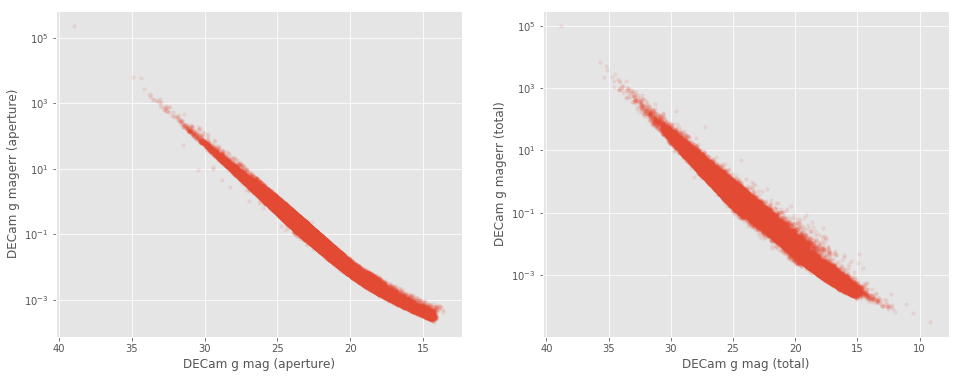

DECam r mag (aperture)
    Error max: 4295
    magerr > 10: Number of objects = 162, min mag = 27.3
    magerr > 100: Number of objects = 15, min mag = 30.5
    magerr > 1000: Number of objects = 3, min mag = 33.1

DECam r mag (total)
    Error max: 1107
    magerr > 10: Number of objects = 259, min mag = 25.2
    magerr > 100: Number of objects = 31, min mag = 30.0
    magerr > 1000: Number of objects = 1, min mag = 33.2



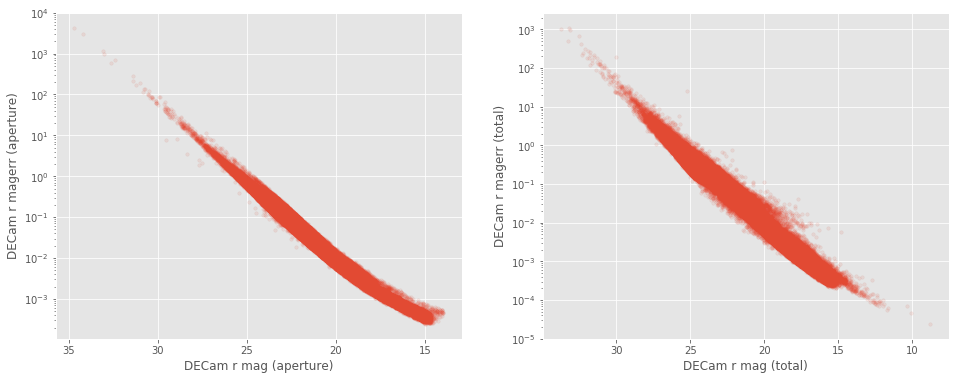

DECam i mag (aperture)
    Error max: 24063
    magerr > 10: Number of objects = 77, min mag = 26.8
    magerr > 100: Number of objects = 14, min mag = 29.1
    magerr > 1000: Number of objects = 2, min mag = 33.3

DECam i mag (total)
    Error max: 566
    magerr > 10: Number of objects = 160, min mag = 26.6
    magerr > 100: Number of objects = 7, min mag = 29.2
    magerr > 1000: Number of objects = 0, min mag = nan



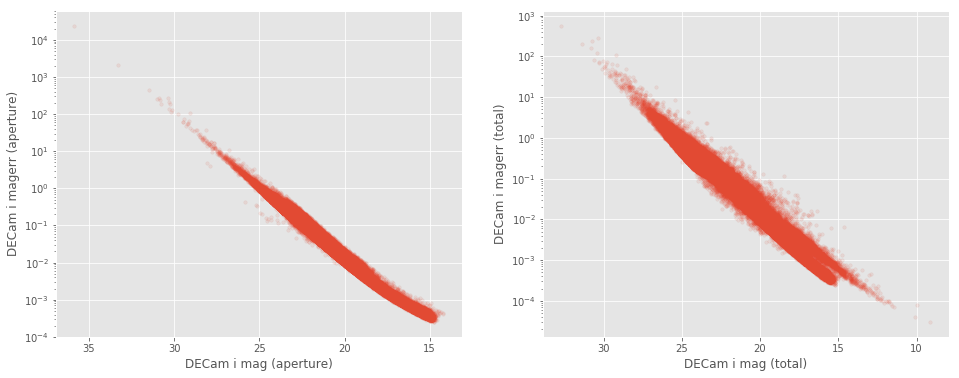

DECam z mag (aperture)
    Error max: 301559
    magerr > 10: Number of objects = 498, min mag = 26.5
    magerr > 100: Number of objects = 54, min mag = 28.7
    magerr > 1000: Number of objects = 8, min mag = 31.9

DECam z mag (total)
    Error max: 50319
    magerr > 10: Number of objects = 1569, min mag = 24.7
    magerr > 100: Number of objects = 161, min mag = 27.0
    magerr > 1000: Number of objects = 15, min mag = 31.9



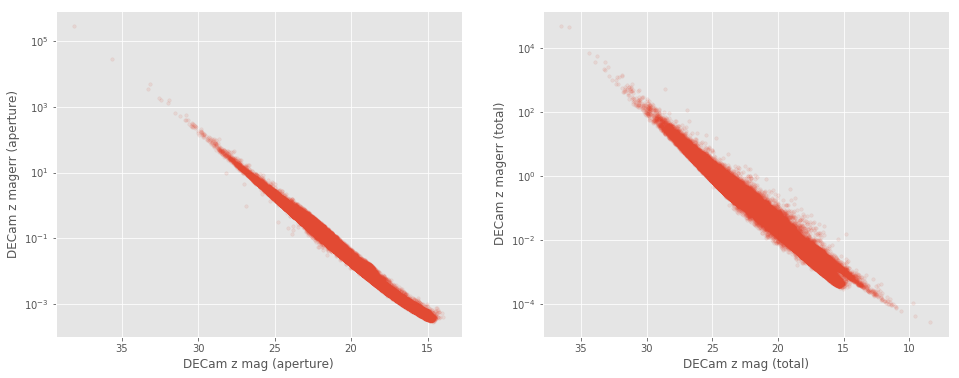

DECam y mag (aperture)
    Error max: 633603
    magerr > 10: Number of objects = 8968, min mag = 24.4
    magerr > 100: Number of objects = 843, min mag = 27.1
    magerr > 1000: Number of objects = 83, min mag = 29.9

DECam y mag (total)
    Error max: 160172
    magerr > 10: Number of objects = 12763, min mag = 23.1
    magerr > 100: Number of objects = 1164, min mag = 27.0
    magerr > 1000: Number of objects = 108, min mag = 30.2



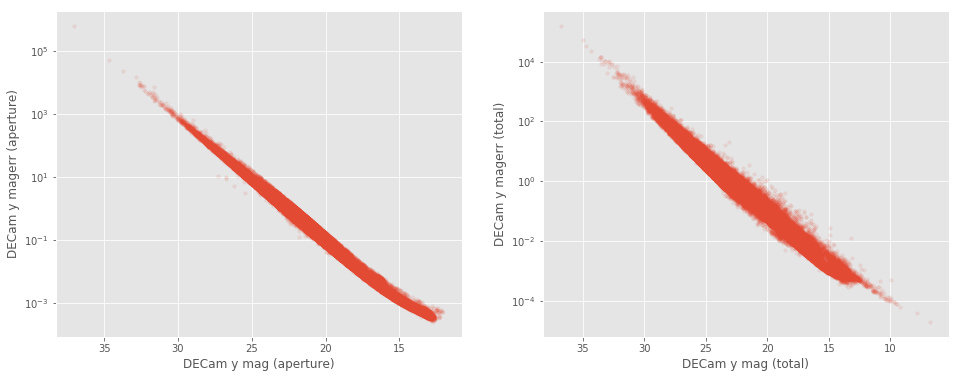

VISTA J mag (aperture)
    Error max: 3
    magerr > 10: Number of objects = 0, min mag = nan
    magerr > 100: Number of objects = 0, min mag = nan
    magerr > 1000: Number of objects = 0, min mag = nan

VISTA J mag (total)
    Error max: 1252
    magerr > 10: Number of objects = 48, min mag = 23.1
    magerr > 100: Number of objects = 6, min mag = 27.3
    magerr > 1000: Number of objects = 1, min mag = 30.3



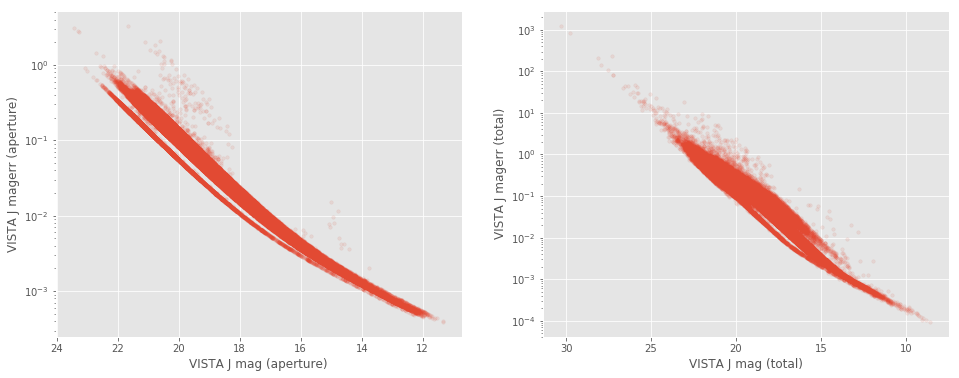

VISTA H mag (aperture)
    Error max: 4
    magerr > 10: Number of objects = 0, min mag = nan
    magerr > 100: Number of objects = 0, min mag = nan
    magerr > 1000: Number of objects = 0, min mag = nan

VISTA H mag (total)
    Error max: 1051
    magerr > 10: Number of objects = 12, min mag = 22.8
    magerr > 100: Number of objects = 1, min mag = 29.7
    magerr > 1000: Number of objects = 1, min mag = 29.7



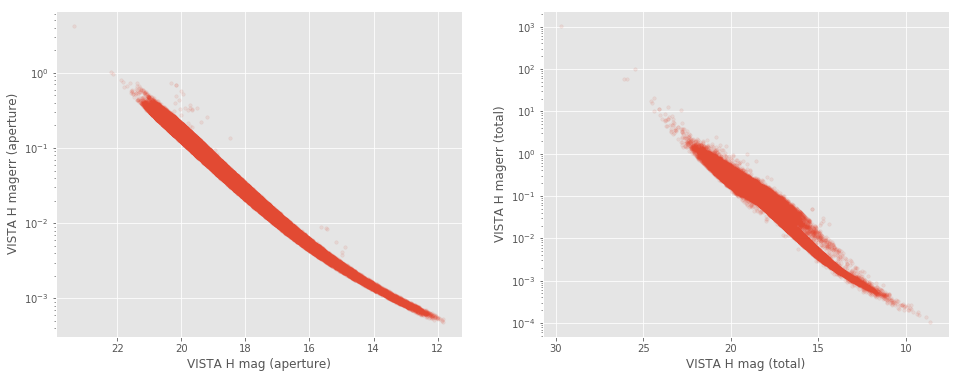

VISTA K mag (aperture)
    Error max: 1
    magerr > 10: Number of objects = 0, min mag = nan
    magerr > 100: Number of objects = 0, min mag = nan
    magerr > 1000: Number of objects = 0, min mag = nan

VISTA K mag (total)
    Error max: 36
    magerr > 10: Number of objects = 4, min mag = 23.9
    magerr > 100: Number of objects = 0, min mag = nan
    magerr > 1000: Number of objects = 0, min mag = nan



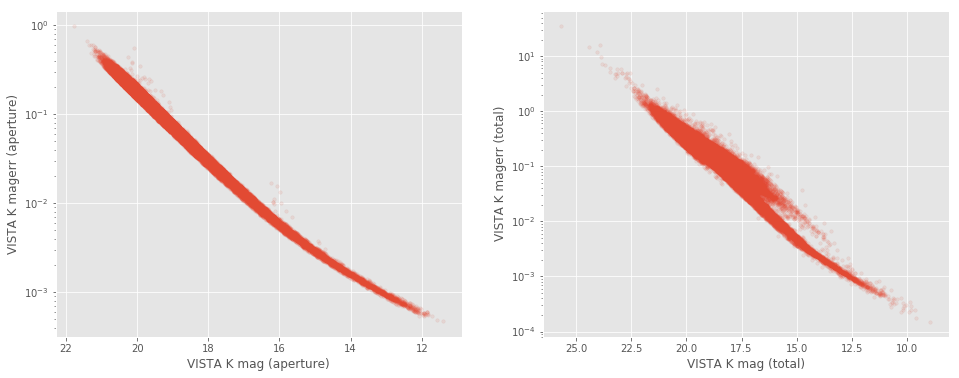

IRAC i1 mag (aperture)
    Error max: 29
    magerr > 10: Number of objects = 2, min mag = 26.2
    magerr > 100: Number of objects = 0, min mag = nan
    magerr > 1000: Number of objects = 0, min mag = nan

IRAC i1 mag (total)
    Error max: 74
    magerr > 10: Number of objects = 6, min mag = 24.6
    magerr > 100: Number of objects = 0, min mag = nan
    magerr > 1000: Number of objects = 0, min mag = nan



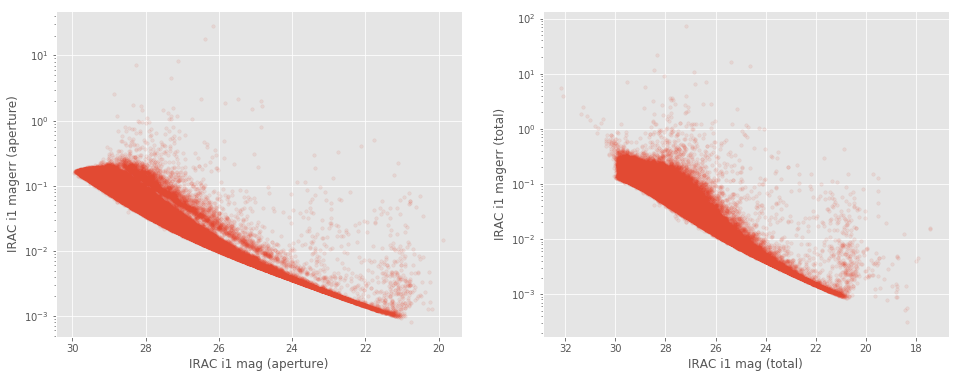

IRAC i2 mag (aperture)
    Error max: 2570
    magerr > 10: Number of objects = 45, min mag = 29.1
    magerr > 100: Number of objects = 3, min mag = 29.4
    magerr > 1000: Number of objects = 1, min mag = 29.4

IRAC i2 mag (total)
    Error max: 4288
    magerr > 10: Number of objects = 110, min mag = 27.9
    magerr > 100: Number of objects = 14, min mag = 29.2
    magerr > 1000: Number of objects = 1, min mag = 29.2



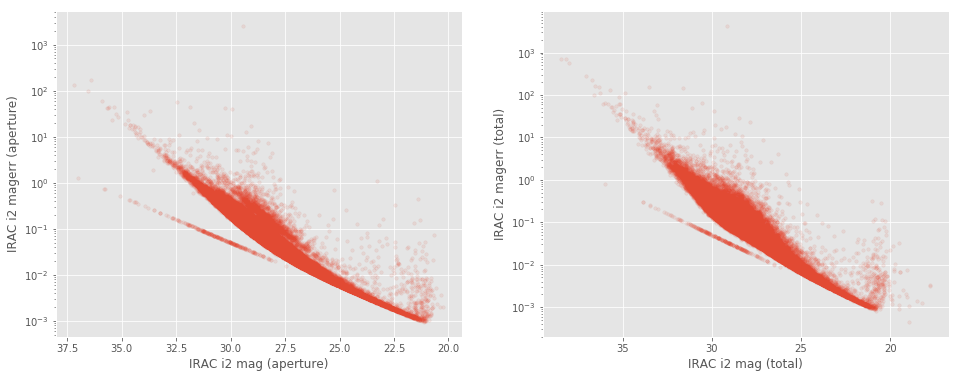

In [10]:
for mag in all_mags:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    
    basecol = mag.replace(" ", "_").lower()
    
    if basecol == "decam_g":
        savefig = True
    else:
        savefig=False
        
    col, ecol = "m_ap_{}".format(basecol), "merr_ap_{}".format(basecol)
    mag_vs_err(master_catalogue[col], master_catalogue[ecol], fig, ax1,
               labels=("{} mag (aperture)".format(mag), "{} magerr (aperture)".format(mag)), savefig=False)

    
    col, ecol = "m_{}".format(basecol), "merr_{}".format(basecol)
    mag_vs_err(master_catalogue[col], master_catalogue[ecol], fig, ax2,
               labels=("{} mag (total)".format(mag), "{} magerr (total)".format(mag)), savefig=savefig)
    
    display(fig)
    plt.close()


## 2/ Magnitude and error issues

In [11]:
def flag_mag(mask, x1, y1, x2, y2, mask2=None, x3=None, y3=None, mask3=None,
             labels1=("x", "y"), labels2=("x", "y"), labels3=("x", "y"), nb=2,
             savefig=False):

    if nb == 2 or (nb == 1 and x3 is None):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 6))
    
    # mag vs magerr
    ax1.set_yscale('log')    # to place before scatter to avoid issues
    ax1.scatter(x1, y1, marker='.', alpha=0.1, s=50)
    ax1.plot(x1[mask], y1[mask], 'b.')
    if mask2 is not None and nb >= 2:
        ax1.plot(x1[mask2], y1[mask2], 'g.')
    ax1.invert_xaxis()
    ax1.set_xlabel(labels1[0])
    ax1.set_ylabel(labels1[1])
    
    if nb == 1:
        # IRAC mag
        ax2.set_yscale('log')    # to place before scatter to avoid issues
        ax2.scatter(x2, y2, marker='.', alpha=0.1, s=50)
        ax2.plot(x2[mask2], y2[mask2], 'b.')
        ax2.invert_xaxis()
        ax2.set_xlabel(labels2[0])
        ax2.set_ylabel(labels2[1])
        
    if nb == 1 and x3 is not None:
        # IRAC mag with i3
        ax3.set_yscale('log')    # to place before scatter to avoid issues
        ax3.scatter(x3, y3, marker='.', alpha=0.1, s=50)
        ax3.plot(x3[mask3], y2[mask3], 'b.')
        ax3.invert_xaxis()
        ax3.set_xlabel(labels3[0])
        ax3.set_ylabel(labels3[1])
    
    # Comparing magnitudes
    if nb >= 2:
        ax2.scatter(x2, y2, marker='.', alpha=0.1, s=50)
        ax2.plot(x2[mask], y2[mask], 'b.')
        if mask2 is not None:
            ax2.plot(x2[mask2], y2[mask2], 'g.')
        ax2.invert_xaxis()
        ax2.invert_yaxis()
        ax2.set_xlabel(labels2[0])
        ax2.set_ylabel(labels2[1])
    
    if nb >= 3:
        ax3.scatter(x3, y3, marker='.', alpha=0.1, s=50)
        ax3.plot(x3[mask], y3[mask], 'b.')
        if mask2 is not None:
            ax3.plot(x3[mask2], y3[mask2], 'g.')
        ax3.invert_xaxis()
        ax3.invert_yaxis()
        ax3.set_xlabel(labels3[0])
        ax3.set_ylabel(labels3[1])
    
    # Save ex. fig
    if savefig:
        survey_label = ((labels1[0].replace(" ", "_")).replace("(", "")).replace(")", "")
        if "GPC1 " in labels1[0]:
            figname = field + "_gpc1Issues_" + survey_label + ".png"
        elif "DECam" in labels1[0]:
            figname = field + "_decamIssues_" + survey_label + ".png"
        elif "IRAC" in labels1[0]:
            figname = field + "_iracIssues_i1_i2.png"
        plt.savefig("/data/help/plots/" + figname, bbox_inches='tight')
        
    display(fig)
    plt.close()

### 2.c IRAC Aperture magnitude

IRAC i1: Number of flagged objects: 0
IRAC i2: Number of flagged objects: 0


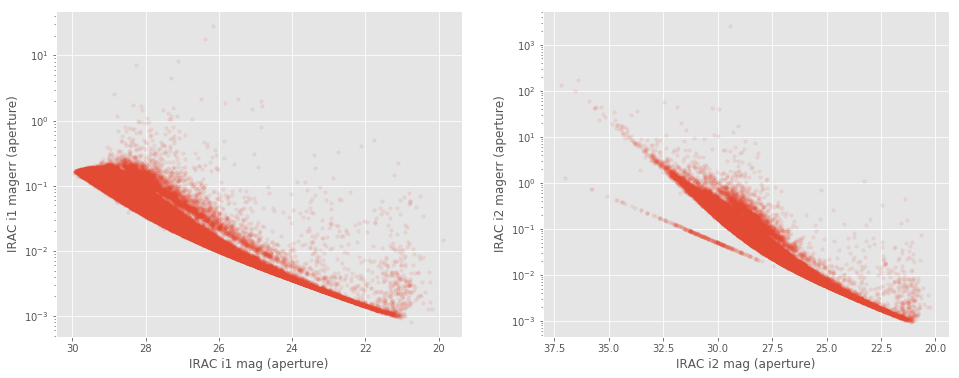

In [13]:
irac_mag = 3.9000000001085695

bands = ['IRAC i1', 'IRAC i2']
    
basecol1, basecol2 = bands[0].replace(" ", "_").lower(), bands[1].replace(" ", "_").lower()
col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
ecol1, ecol2 = "merr_ap_{}".format(basecol1), "merr_ap_{}".format(basecol2)
    
mask1 = np.where(master_catalogue[col1] == irac_mag)[0]   
print ('IRAC i1: Number of flagged objects:', len(master_catalogue[col1][mask1]))

mask2 = np.where(master_catalogue[col2] == irac_mag)[0]  
print ('IRAC i2: Number of flagged objects:', len(master_catalogue[col2][mask2]))

flag_mag(mask1, master_catalogue[col1], master_catalogue[ecol1],
         master_catalogue[col2], master_catalogue[ecol2], mask2=mask2,
         labels1=("{} mag (aperture)".format(bands[0]), "{} magerr (aperture)".format(bands[0])),
         labels2=("{} mag (aperture)".format(bands[1]), "{} magerr (aperture)".format(bands[1])),
         nb=1, savefig=True)

## 3/ Outliers

$$chi^2 = \frac{(mag_{1}-mag_{2})^2}{magerr_{1}^2 + magerr_{2}^2}$$ 
<br>
__Interquartile range (IQR) and outliers:__<br>
We consider as outliers objects which have a high $chi^2$, about $5\sigma$ away from the mean.<br>
$25th, 75th \;percentile = 0.6745\sigma$<br>
$IQR = (75th \;percentile - 25th \;percentile) = 0.6745\sigma * 2 = 1.349\sigma$<br>
$75th \;percentile + 3.2\times IQR = 0.6745\sigma + 3.2\times1.349\sigma = 5\sigma$
<br><br>
$$outliers == [chi^2 >  (75th \;percentile + 3.2\times (75th \;percentile - 25th \;percentile))]$$
<br><br>
__NB:__<br>
Bright sources tend to have their errors underestimated with values as low as $10^{-6}$, which is unrealistic. So to avoid high $chi^2$ due to unrealistic small errors, we clip the error to get a minimum value of 0.1% (i.e. all errors smaller then $10^{-3}$ are set to $10^{-3}$).

In [14]:
def outliers(x, y, xerr, yerr, labels=["x", "y"], savefig=False):
    
    import matplotlib
    import matplotlib.gridspec as gridspec
    from astropy import visualization as vz
    
    fig = plt.figure(figsize=(13, 6))

    gs1 = gridspec.GridSpec(1, 1)
    gs1.update(left=0.05, right=0.4, wspace=0.05)
    ax1 = plt.subplot(gs1[:, :-1])

    gs2 = gridspec.GridSpec(1, 3)
    gs2.update(left=0.47, right=0.98, hspace=0.05, wspace=0.05)
    ax2 = plt.subplot(gs2[:, :-1])
    ax3 = plt.subplot(gs2[:, -1], sharey=ax2)

    
    # Use only finite values
    mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(xerr) & np.isfinite(yerr) & (xerr !=99.) & (yerr !=99.)
    x = np.copy(x[mask])
    y = np.copy(y[mask])
    xerr = np.copy(xerr[mask])
    yerr = np.copy(yerr[mask])
    
    # mag1 - mag2
    diff = y - x

    x_label, y_label = labels
    
    # If the difference is all NaN there is nothing to compare.
    if np.isnan(diff).all():
        print("No sources have both {} and {} values.".format(
            x_label, y_label))
        print("")
        return
    
    # Set the minimum error to 10^-3
    np.clip(xerr, 1e-3, np.max(xerr), out=xerr)
    np.clip(yerr, 1e-3, np.max(yerr), out=yerr)

    # Median, Median absolute deviation and 1% and 99% percentiles
    diff_median = np.median(diff)
    diff_mad = np.median(np.abs(diff - diff_median))
    diff_1p, diff_99p = np.percentile(diff, [1., 99.])
    diff_25p, diff_75p = np.percentile(diff, [25., 75.])
    
    
    diff_label = "{} - {}".format(y_label, x_label)

    print("{} ({} sources):".format(diff_label, len(x)))
    print("- Median: {:.2f}".format(diff_median))
    print("- Median Absolute Deviation: {:.2f}".format(diff_mad))
    print("- 1% percentile: {}".format(diff_1p))
    print("- 99% percentile: {}".format(diff_99p))

    
    # Chi2 (Normalized difference)   
    ichi2 = np.power(diff, 2) / (np.power(xerr, 2) + np.power(yerr, 2))
    
    # Use only non-null values of ichi2
    mask2 = ichi2 != 0.0
    diff, ichi2 = np.copy(diff[mask2]), np.copy(ichi2[mask2])
    x, y, xerr, yerr = np.copy(x[mask2]), np.copy(y[mask2]), np.copy(xerr[mask2]), np.copy(yerr[mask2])

    # Outliers (5sigma)
    log_ichi2_25p, log_ichi2_75p = np.percentile(np.log10(ichi2), [25., 75.])
    out_lim = log_ichi2_75p + 3.2*abs(log_ichi2_25p-log_ichi2_75p)
    
    outliers = np.log10(ichi2) > out_lim 
    nb_outliers = len(x[outliers])
    
    print("Outliers separation: log(chi2) = {:.2f}".format(out_lim))
    print("Number of outliers: {}".format(nb_outliers))

    print("")

    # Comparing mag
    ax1.scatter(x, y, marker='.', alpha=0.1, s=50)
    ax1.scatter(x[outliers], y[outliers], marker='.', c='b', alpha=0.3, s=50, label='Outliers ({})'.format(nb_outliers))
    min_val = np.min(np.r_[x, y])
    max_val = np.max(np.r_[x, y])
    ax1.autoscale(False)
    ax1.plot([min_val, max_val], [min_val, max_val], "k:")
    ax1.invert_xaxis()
    ax1.invert_yaxis()
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.legend(loc='lower right', numpoints=1)
    

    # Chi2 vs Diff
    #ax1.set_yscale('log')    # to place before scatter to avoid issues
    ax2.scatter(diff, np.log10(ichi2), marker='.', alpha=0.1, s=50)
    if nb_outliers != 0:
        ax2.scatter(diff[outliers], np.log10(ichi2[outliers]), marker='.', alpha=0.3, s=50, color='b',\
                    label='Outliers ({})'.format(nb_outliers))
    ax2.axhline(out_lim, color='grey', linestyle=':')
    ax2.set_xlabel(diff_label)
    ax2.set_ylabel('log(chi2)')
    ax2.legend(loc='lower right', numpoints=1)
    
    # Hist
    n, bins, patches = vz.hist(np.log10(ichi2), ax=ax3, bins='knuth', facecolor='red', lw = 2, alpha=0.5,\
                                   orientation="horizontal")
    if nb_outliers > 3:
        n, bins, patches = vz.hist(np.log10(ichi2[outliers]), ax=ax3, bins='knuth', facecolor='b', lw = 2, alpha=0.7,\
                                   orientation="horizontal")
    ax3.axhline(out_lim, color='grey', linestyle=':')
    ax3.yaxis.set_tick_params(labelleft=False)
    
    # Save ex. fig
    if savefig:
        survey_label = ((diff_label.replace(" ", "_")).replace("(", "")).replace(")", "")
        figname = field + "_outliers_" + survey_label + ".png"
        plt.savefig("/data/help/plots/" + figname, bbox_inches='tight')


    display(fig)
    plt.close()

In [15]:
for band_of_a_kind in all_bands:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):

        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        if basecol1 == "decam_z" and basecol2 == "vista_z":
            savefig = True
        else:
            savefig = False
        
        # Aperture mag
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        ecol1, ecol2 = "merr_ap_{}".format(basecol1), "merr_ap_{}".format(basecol2)
        outliers(master_catalogue[col1], master_catalogue[col2],
                 master_catalogue[ecol1], master_catalogue[ecol2],
                 labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        # Tot mag
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        ecol1, ecol2 = "merr_{}".format(basecol1), "merr_{}".format(basecol2)
        outliers(master_catalogue[col1], master_catalogue[col2], 
                 master_catalogue[ecol1], master_catalogue[ecol2],
                 labels=("{} (total)".format(band1), "{} (total)".format(band2)), savefig=savefig)


## 4. Aperture correction issues

In [16]:
def apcor_check(x, y, stellarity, labels=["x", "y"], savefig=False):
    import matplotlib.gridspec as gridspec
    from astropy import visualization as vz
    
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))   # 
    fig = plt.figure(figsize=(13, 6))

    gs1 = gridspec.GridSpec(1, 1)
    gs1.update(left=0.05, right=0.4, wspace=0.05)
    ax1 = plt.subplot(gs1[:, :-1])

    gs2 = gridspec.GridSpec(1, 3)
    gs2.update(left=0.47, right=0.98, hspace=0.05, wspace=0.05)
    ax2 = plt.subplot(gs2[:, :-1])
    ax3 = plt.subplot(gs2[:, -1], sharey=ax2)

    
    # Use only finite values
    mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(stellarity)
    x = np.copy(x[mask])
    y = np.copy(y[mask])
    stellarity = np.copy(stellarity[mask])


    diff = y - x

    x_label, y_label = labels
    
    # If the difference is all NaN there is nothing to compare.
    if np.isnan(diff).all():
        print("No sources have both {} and {} values.".format(
            x_label, y_label))
        print("")
        return
    
    
    diff_label = "{} - {}".format(y_label, x_label)
    print("{}:".format(diff_label))
    
    # Subsample
    zoom = (x > 16) & (x < 20)


    # Comparing mag
    ax1.scatter(x, diff, marker='.', alpha=0.1, s=50)
    ax1.invert_xaxis()
    ax1.set_ylabel(diff_label)
    ax1.set_xlabel(x_label)
    

    # Zoom Plot
    y_min, y_max = np.percentile(diff[zoom], [1., 99.])
    y_delta = .1 * (y_max - y_min)
    y_min -= y_delta
    y_max += y_delta

    if len(x[zoom]) < 1000:
        alpha = 0.4
    else:
        alpha = 0.1
    print(len(x[zoom]))
    pl = ax2.scatter(x[zoom], diff[zoom], marker='.', alpha=alpha, s=50, c=stellarity[zoom], cmap="jet")
    ax2.invert_xaxis()
    ax2.set_ylabel(diff_label)
    ax2.set_xlabel(x_label)
    ax2.set_ylim([y_min, y_max])
    fig.colorbar(pl, label="stellarity (1=star)")
    
    #ax2.legend(loc='lower right', numpoints=1)
    
    # Hist
    n, bins, patches = vz.hist(diff[zoom], ax=ax3, bins='knuth', facecolor='black', lw = 2, alpha=0.5,\
                                   orientation="horizontal")
    ax3.yaxis.set_tick_params(labelleft=False)
    
    # Save ex. fig
    if savefig:
        survey_label = ((diff_label.replace(" ", "_")).replace("(", "")).replace(")", "")
        figname = field + "_apcorrIssues_" + survey_label + ".png"
        plt.savefig("/data/help/plots/" + figname, bbox_inches='tight')


    display(fig)
    plt.close()

In [17]:
for band_of_a_kind in all_bands:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):

        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
       
        if basecol1 == "decam_y" and basecol2 == "vista_y":
            savefig = True
        else:
            savefig = False
            
        
        
        # Aperture mag
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)

        apcor_check(master_catalogue[col1], master_catalogue[col2], master_catalogue['stellarity'],
                 labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)), savefig=savefig)
